In [79]:
from modules import *
import json
import plotly.graph_objects as go
import numpy as np
import os

In [80]:

pathdata0 = os.getcwd()+"/../data/lineas_completas/XIN803.json"


In [81]:

with open(pathdata0, 'r') as archivo:
    data = json.load(archivo)
    
len(data)

163

In [82]:

print_element(data[1])


OBJECTID_VANO_2D: 3

ID_VANO: G_13645776_13645990

LONGITUD_2D: 244.90915712729154

COORDENADA_X_INICIO: 114747.02460000012

COORDENADA_Y_INICIO: 4669127.1493999995

COORDENADA_X_FIN: 114829.23730000015

COORDEANDA_Y_FIN: 4668896.451400001

APOYOS: 
- Length of list: 2
    OBJECTID_APOYO_3D: 135
    COD_APOYO: 13645990
    COORDENADA_X: 114747.02460000012
    COORDEANDA_Y: 4669127.1493999995
    COORDENADAS_Z: [650.8331999999937, 661.3448000000062]
    - Length of list: 2

CONDUCTORES: 
- Length of list: 6
    OBJECTID_VANO_3D: 445
    LONGITUD_2D: 118.80707232286899
    LONGITUD_3D: 118.91190848119386
    VERTICES: [[114787.9598000003, 4669012.0627, 658.4315999999963], [114785.10840000026, 4669020.055600001, 658.1447999999946], [114782.25719999988, 4669028.0485, 657.9321000000054], [114779.40610000025, 4669036.0414, 657.7934999999998], [114776.5552000003, 4669044.034399999, 657.7290000000066], [114773.70440000016, 4669052.0275, 657.7385000000068], [114770.85369999986, 4669060.0206, 6

In [83]:
x=[]
y=[]
for iel,el in enumerate(data):
    print(el['ID_VANO'])
    for ir,r in enumerate(data[iel]['APOYOS']):
        x.append(data[iel]['APOYOS'][ir]['COORDENADA_X'])
        y.append(data[iel]['APOYOS'][ir]['COORDEANDA_Y'])

G_13645821_13645987
G_13645776_13645990
G_13645684_13645777
G_13615863_13645824
G_13645732_13645823
G_13499432_13645947
G_13645686_13645952
G_13037116_13511437
G_13618881_13645690
G_13645790_13645962
G_13645744_13645920
G_13645844_13645888
G_13645647_13645791
G_13645750_13645842
G_13645707_13645750
G_13645718_13645899
G_13645765_13645809
G_13645665_13645719
G_13088932_13645854
G_13145989_13645938
G_13645721_13645813
G_13645767_13645812
G_13645817_13645977
G_13645668_13645817
G_13645771_13645980
G_13645819_13645906
G_13645819_13645981
G_13645981_13645982
G_13645776_13645989
G_13645683_13645951
G_13645681_13645867
G_13645733_13645868
G_13645738_13645781
G_13645687_13645874
G_13645737_13645873
G_13511437_13511438
G_13645910_13645956
G_13645695_13645696
G_13597802_13645916
G_13645947_13645992
G_13645661_13645713
G_13645798_13645842
G_13645720_13645855
G_13645809_13645810
G_13645722_13645939
G_13645816_13645900
G_13645772_13645944
G_13645821_13645862
G_13645727_13645822
G_13645683_13645684


In [84]:

pathdata2 = os.getcwd()+"/../data/lineas_completas/REG804.json"

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)

x=[]
y=[]
ids=[]
ids_single_backing=[]
for iel,el in enumerate(data):
    # for ir,r in enumerate(data[iel]['APOYOS']):
    if len(data[iel]['APOYOS'])==2:
        ids.append(data[iel]['ID_VANO'])
        x.append((data[iel]['APOYOS'][ir]['COORDENADA_X']+data[iel]['APOYOS'][ir]['COORDENADA_X'])/2)
        y.append((data[iel]['APOYOS'][ir]['COORDEANDA_Y']+data[iel]['APOYOS'][ir]['COORDEANDA_Y'])/2)   
    else:
        ids_single_backing.append(data[iel]['ID_VANO'])

In [85]:
ids_single_backing

['G_13576748_13576812',
 'G_13578285_13578315',
 'G_13578391_13578442',
 'G_13528124_13528233',
 'G_13578341_13578423',
 'G_13576748_13576801',
 'G_13578381_13578395']

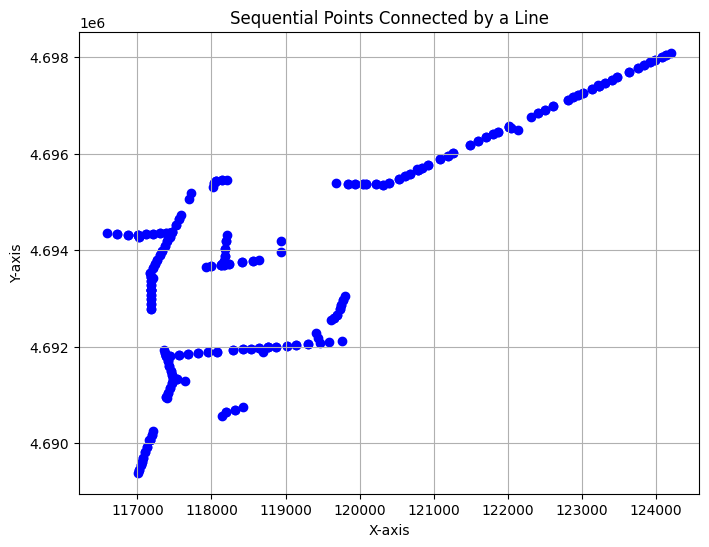

In [86]:
ids=[]
x=[]
y=[]
pathdata2 = os.getcwd()+"/../data/lineas_completas/REG804.json"

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)
    
for iel,el in enumerate(data):
    for ir,r in enumerate(data[iel]['APOYOS']):
        ids.append(data[iel]['ID_VANO'])
        x.append(data[iel]['APOYOS'][ir]['COORDENADA_X'])
        y.append(data[iel]['APOYOS'][ir]['COORDEANDA_Y'])
        
plt.figure(figsize=(8, 6))

# Plot the points and connect them with a line
plt.scatter(x, y, marker='o', color='b')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Sequential Points Connected by a Line')

# Show the plot
plt.grid(True)
plt.show()

In [87]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(pd.DataFrame({'x':x,'y':y}))
    
k=10

neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, k-1], axis=0)
second_derivative = np.diff(distances, n=5)
inflection_point = np.argmax(second_derivative) + 1 

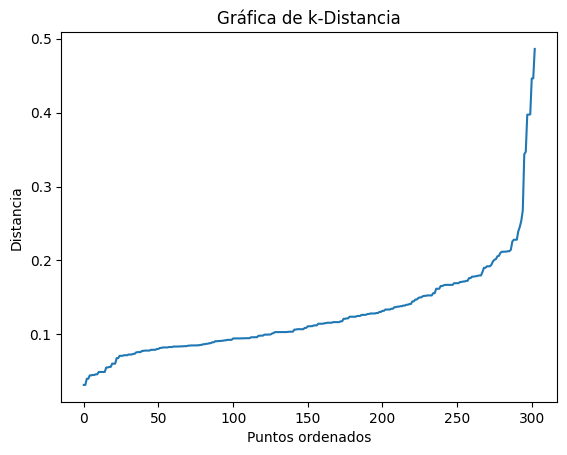

In [88]:

plt.plot(distances)
plt.ylabel('Distancia')
plt.xlabel('Puntos ordenados')
plt.title('Gráfica de k-Distancia')
plt.show()

In [89]:

# Aplicar DBSCAN
dbscan = DBSCAN(eps=distances[inflection_point], min_samples=k, algorithm = "auto")  # Ajusta eps y min_samples según tus datos
labels = dbscan.fit_predict(X)


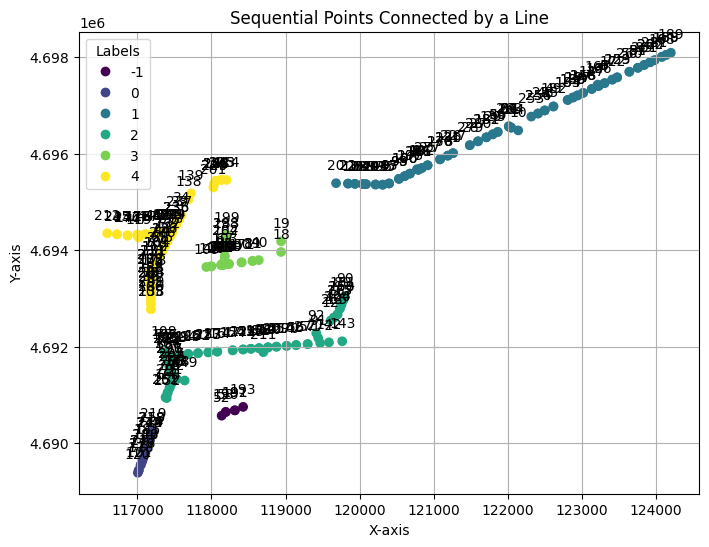

In [90]:

plt.figure(figsize=(8, 6))

# Plot the points and connect them with a line
scatter =plt.scatter(x, y, marker='o', c=labels, cmap='viridis', label = labels)

for i, label in enumerate(labels):
    plt.annotate(i, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Sequential Points Connected by a Line')
# Show the plot
handles, _ = scatter.legend_elements()

plt.legend(handles, np.unique(labels), title="Labels")
plt.grid(True)
plt.show()

In [91]:

scaler_x=StandardScaler()
scaler_y=StandardScaler()
x=scaler_x.fit_transform(np.array(x).reshape(-1,1))
y=scaler_y.fit_transform(np.array(y).reshape(-1,1))
X=pd.DataFrame({'ids':ids,'x':x.flatten(),'y':y.flatten()})
idval_linear=X.loc[labels==1,'ids'].to_list()
idval_intersections=X.loc[labels==2,'ids'].to_list()

In [92]:
X_linear=X.loc[labels==1,:]
X_linear

,ids,x,y
2,G_13576896_13576897,1.844223,1.524713
3,G_13576896_13576897,1.886305,1.553111
4,G_13576773_13576897,1.886305,1.553111
5,G_13576773_13576897,1.923849,1.578640
6,G_13576773_13576774,1.923849,1.578640
...,...,...,...
277,G_13576793_13576884,0.824000,0.818806
278,G_13576793_13576884,0.901201,0.873460
279,G_13576748_13576801,1.086229,1.004312
280,G_13576762_13576851,1.137195,1.040518


In [93]:

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X_linear.iloc[:,1:])
distances, indices = nbrs.kneighbors(X_linear.iloc[:,1:])

In [94]:
X_linear.shape

(94, 3)

In [95]:
indices

array([[ 0, 54,  2, 55,  1],
       [55,  1,  2, 56,  4],
       [55,  1,  2, 56,  4],
       [ 3,  4, 56, 55,  2],
       [ 3,  4, 56, 55,  2],
       [ 5, 43, 44, 81,  4],
       [ 6, 72, 71, 84, 57],
       [ 7, 57, 65, 58, 72],
       [ 8, 86,  9, 33, 85],
       [86,  9, 29, 33, 85],
       [10, 11, 12, 45, 13],
       [11, 12, 13, 45, 10],
       [11, 12, 13, 45, 10],
       [13, 45, 11, 12, 27],
       [42, 14, 21, 88, 41],
       [15, 89, 42, 14, 88],
       [74, 16, 48, 73, 90],
       [17, 92, 18, 91, 93],
       [18, 91, 17, 92, 93],
       [19, 50, 30, 20, 49],
       [20, 30, 19, 50, 29],
       [21, 41, 88, 22, 14],
       [22, 21, 88, 41, 14],
       [77, 23, 78, 76, 59],
       [59, 24, 77, 23, 60],
       [82, 25, 26, 31, 81],
       [31, 26, 32, 83, 25],
       [46, 27, 28, 51, 13],
       [28, 51, 27, 46, 67],
       [33, 85, 29, 34,  9],
       [20, 30, 19, 50, 29],
       [31, 26, 32, 83, 25],
       [83, 32, 71, 84, 26],
       [33, 85, 29, 34,  9],
       [34, 33

In [96]:
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X_linear.loc[:,'x'], y=X_linear.loc[:,'y'],
    mode='markers+text',  # Add markers and text
    text=[str(i) for i in range(len(X_linear.loc[:,'ids']))],  # Annotate with indices
    textposition="top center",
    marker=dict(
        color=px.colors.sequential.Viridis,  # Use Viridis colormap
        size=10,
        line=dict(
            color='DarkSlateGrey',
            width=2
        )
    )
))
fig.update_layout(
    title='Sequential Points Connected by a Line',
    xaxis_title='X-axis',
    yaxis_title='Y-axis',
    legend_title='Labels',
    showlegend=False,
    template="plotly_white"
)
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()


In [97]:

pathdata2 = os.getcwd()+"/../data/lineas_completas/REG804.json"

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)


In [98]:

parameters1,incomplete_vanos1=fit_vano(data,sublist=idval_linear)


Processing Vano 0

Processing Vano 1
Umbral de corte inferior detectado: -2784357.7462366684
Umbral de corte superior detectado: -2784247.5663992786

Processing Vano 2
Umbral de corte inferior detectado: -2797900.2300038426
Umbral de corte superior detectado: -2797801.6903558127
Error en el cluster G_13576773_13576897
This cluster represents: 0.69%

Processing Vano 3
Umbral de corte inferior detectado: -2799930.109122286
Umbral de corte superior detectado: -2799804.903328614
Error en el cluster G_13576773_13576774
This cluster represents: 0.44%

Processing Vano 4
Umbral de corte inferior detectado: -2802456.108395775
Umbral de corte superior detectado: -2802335.382156318
Error en el cluster G_13576907_13576908
This cluster represents: 1.67%

Processing Vano 5
Umbral de corte superior detectado: -2340533.210728575

Processing Vano 6

Processing Vano 7

Processing Vano 8

Processing Vano 9

Processing Vano 10
Umbral de corte inferior detectado: 118832.53365239952

Processing Vano 11
Umb

In [99]:

parameters2,incomplete_vanos2=fit_vano(data,sublist=idval_intersections)


Processing Vano 0

Processing Vano 1

Processing Vano 2

Processing Vano 3

Processing Vano 4

Processing Vano 5

Processing Vano 6
Umbral de corte inferior detectado: -3832123.7057611994

Processing Vano 7
Umbral de corte inferior detectado: -708907.28493114

Processing Vano 8
Umbral de corte inferior detectado: -710058.0912884551

Processing Vano 9

Processing Vano 10

Processing Vano 11

Processing Vano 12

Processing Vano 13

Processing Vano 14

Processing Vano 15

Processing Vano 16

Processing Vano 17

Processing Vano 18

Processing Vano 19

Processing Vano 20

Processing Vano 21

Processing Vano 22

Processing Vano 23

Processing Vano 24

Processing Vano 25

Processing Vano 26

Processing Vano 27

Processing Vano 28
Umbral de corte inferior detectado: -711215.2702545001

Processing Vano 29
Umbral de corte inferior detectado: -713259.4252104687

Processing Vano 30
Umbral de corte inferior detectado: -706476.5071047008

Processing Vano 31
Umbral de corte inferior detectado: 70403

In [100]:
def flatten_sublist(sublist):
    flat_list = [sublist[0]] 
    for array in sublist[1:]:
        flat_list.extend(array.tolist()) 
    return flat_list


In [101]:

parameters2,incomplete_vanos2=fit_vano(data,sublist=idval_intersections)


Processing Vano 0

Processing Vano 1

Processing Vano 2

Processing Vano 3

Processing Vano 4

Processing Vano 5

Processing Vano 6
Umbral de corte inferior detectado: -3832123.7057611994

Processing Vano 7
Umbral de corte inferior detectado: -708907.28493114

Processing Vano 8
Umbral de corte inferior detectado: -710058.0912884551

Processing Vano 9

Processing Vano 10

Processing Vano 11

Processing Vano 12

Processing Vano 13

Processing Vano 14

Processing Vano 15

Processing Vano 16

Processing Vano 17

Processing Vano 18

Processing Vano 19

Processing Vano 20

Processing Vano 21

Processing Vano 22

Processing Vano 23

Processing Vano 24

Processing Vano 25

Processing Vano 26

Processing Vano 27

Processing Vano 28
Umbral de corte inferior detectado: -711215.2702545001

Processing Vano 29
Umbral de corte inferior detectado: -713259.4252104687

Processing Vano 30
Umbral de corte inferior detectado: -706476.5071047008

Processing Vano 31
Umbral de corte inferior detectado: 70403

In [102]:

flattened_data = [flatten_sublist(sublist) for sublist in parameters2]

columns = ['ID', 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']
df2 = pd.DataFrame(flattened_data, columns=columns)

In [103]:


flattened_data = [flatten_sublist(sublist) for sublist in parameters1]

columns = ['ID', 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']
df1 = pd.DataFrame(flattened_data, columns=columns)


In [104]:
df1

,ID,A1,A2,A3,B1,B2,B3,C1,C2,C3
0,G_13576896_13576897,2.038540,1.046257,-2.664252,1.931349,0.865662,-2.460569,1.975307,1.083891,-2.527977
1,G_13578307_13578514,1.206342,0.512347,-1.903808,1.197493,0.498227,-1.859979,1.179753,0.505779,-1.759215
2,G_13578475_13578503,4.824740,4.254394,-6.998371,4.740665,4.201438,-6.863833,NaN,NaN,NaN
3,G_13578475_13578516,23.280071,20.406990,-32.854658,21.668910,18.907918,-30.480393,NaN,NaN,NaN
4,G_13576793_13576873,4.280692,-3.757318,-6.418368,2.207835,-1.209627,-2.595733,3.644177,-2.575015,-4.743407
5,G_13576762_13576801,2.910029,2.308738,-4.100410,3.817539,3.224920,-5.504790,3.171217,2.492883,-4.417284
6,G_13576736_13576740,10.890305,-9.828735,-15.870542,6.087806,-4.034526,-7.390147,9.545039,-7.683324,-12.868406
7,G_13576769_13576858,2269.836737,-1459.101152,-2755.467895,38429.401655,-3665.972694,-38604.541350,15906.737661,147.574125,-15907.414427
8,G_13576890_13576891,2.677291,-1.913656,-3.939076,2.916451,-2.039709,-3.487867,2.690354,-1.970830,-3.659869
9,G_13577128_13577129,1.863745,-0.672877,-2.510054,1.789217,-1.234709,-2.409068,1.685948,-0.899171,-2.266249


In [105]:

dfd=df1.dropna().copy()
for i in  [ 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']:
    
    IQR=dfd[i].quantile(0.75)-dfd[i].quantile(0.25)
    dfd=dfd.loc[(dfd[i]>dfd[i].quantile(0.25)-1.5*IQR)&(dfd[i]<dfd[i].quantile(0.75)+1.5*IQR),:]
    

In [106]:
dfd

,ID,A1,A2,A3,B1,B2,B3,C1,C2,C3
0,G_13576896_13576897,2.038540,1.046257,-2.664252,1.931349,0.865662,-2.460569,1.975307,1.083891,-2.527977
1,G_13578307_13578514,1.206342,0.512347,-1.903808,1.197493,0.498227,-1.859979,1.179753,0.505779,-1.759215
4,G_13576793_13576873,4.280692,-3.757318,-6.418368,2.207835,-1.209627,-2.595733,3.644177,-2.575015,-4.743407
5,G_13576762_13576801,2.910029,2.308738,-4.100410,3.817539,3.224920,-5.504790,3.171217,2.492883,-4.417284
8,G_13576890_13576891,2.677291,-1.913656,-3.939076,2.916451,-2.039709,-3.487867,2.690354,-1.970830,-3.659869
9,G_13577128_13577129,1.863745,-0.672877,-2.510054,1.789217,-1.234709,-2.409068,1.685948,-0.899171,-2.266249
13,G_13576786_13576866,1.965694,-1.532841,-3.111582,1.009581,-1.136064,-1.934864,2.213117,-1.638011,-3.076281
15,G_13576858_13576873,6.286441,-3.776322,-7.553519,3.975583,-3.462114,-5.389336,2.804822,-1.073687,-3.389477
16,G_13576774_13577127,6.214199,-4.502221,-8.337218,2.577442,-0.675285,-2.558437,4.021427,-1.868833,-4.577798
18,G_13576780_13576884,3.777552,3.337945,-5.691014,3.100620,2.119638,-3.913689,3.862762,3.123687,-5.351047


In [107]:
dfd.describe()

,A1,A2,A3,B1,B2,B3,C1,C2,C3
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2.770489,-0.525273,-3.921277,2.262944,-0.120726,-2.922859,2.377567,-0.098020,-3.227332
std,1.636450,2.296011,2.039488,0.986159,1.762469,1.298561,1.000352,1.746162,1.176182
min,0.838368,-4.502221,-8.337218,0.831181,-3.462114,-5.504790,0.822952,-2.575015,-5.351047
25%,1.708811,-1.913656,-5.100399,1.659719,-1.209627,-3.598650,1.685948,-1.638011,-4.261418
50%,2.038540,-0.311483,-3.111582,1.931349,-0.675285,-2.544620,2.213117,-0.132482,-3.076281
75%,3.606413,1.046257,-2.277515,2.916451,1.000682,-1.934864,3.171217,1.083891,-2.266249
max,6.286441,3.337945,-1.903808,3.975583,3.224920,-1.073407,4.021427,3.123687,-1.593557


In [108]:
import seaborn as sns

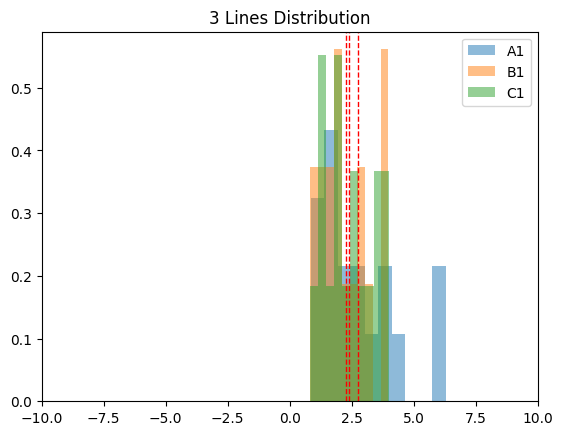

In [109]:
for ai in  ['A1','B1','C1']:
    mn=dfd[ai].mean()
    plt.hist(dfd[ai],label=ai,alpha=0.5,density=True)
    plt.axvline(mn, color='red', linestyle='--', linewidth=1)
plt.xlim(-10,10)
plt.legend()
plt.title('3 Lines Distribution')
plt.show()

In [110]:
total=pd.concat([dfd['A1'],dfd['B1'],dfd['C1']],axis=0)

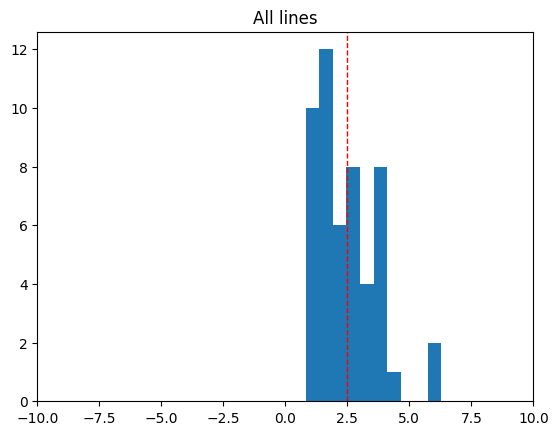

In [111]:

bin_edges = np.linspace(-10, 10, 30)  
mn=total.mean()
plt.hist(total)
plt.xlim(-10,10)
plt.axvline(mn, color='red', linestyle='--', linewidth=1)
plt.title('All lines')
plt.show()


In [112]:
def flatten_sublist(sublist):
    flat_list = [sublist[0]] 
    for array in sublist[1:]:
        flat_list.extend(array.tolist()) 
    return flat_list

def pretreatment_linegroup(parameters):
    flattened_data = [flatten_sublist(sublist) for sublist in parameters]
    columns = ['ID', 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']
    df = pd.DataFrame(flattened_data, columns=columns)
    dfd=df.dropna().copy()
    for i in  [ 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']:
        
        IQR=dfd[i].quantile(0.75)-dfd[i].quantile(0.25)
        dfd=dfd.loc[(dfd[i]>dfd[i].quantile(0.25)-1.5*IQR)&(dfd[i]<dfd[i].quantile(0.75)+1.5*IQR),:]
    
    return dfd

def plot_linegroup_parameters(dfd):
    for ai in  ['A1','B1','C1']:
        mn=dfd[ai].mean()
        plt.hist(dfd[ai],label=ai,alpha=0.5,density=True)
        plt.axvline(mn, color='red', linestyle='--', linewidth=1)
    plt.xlim(-10,10)
    plt.legend()
    plt.title('3 Lines Distribution')
    plt.show()
    total=pd.concat([dfd['A1'],dfd['B1'],dfd['C1']],axis=0)

    mn=total.mean()
    plt.hist(total)
    plt.xlim(-10,10)
    plt.axvline(mn, color='red', linestyle='--', linewidth=1)
    plt.title('All lines')
    plt.show()

def data_middlepoints(data):

    x=[]
    y=[]
    ids=[]
    ids_single_backing=[]
    for iel,el in enumerate(data):
        
        if len(data[iel]['APOYOS'])==2:
            ids.append(data[iel]['ID_VANO'])
            x.append((data[iel]['APOYOS'][ir]['COORDENADA_X']+data[iel]['APOYOS'][ir]['COORDENADA_X'])/2)
            y.append((data[iel]['APOYOS'][ir]['COORDEANDA_Y']+data[iel]['APOYOS'][ir]['COORDEANDA_Y'])/2)   
        else:
            ids_single_backing.append(data[iel]['ID_VANO'])

    scaler_x=StandardScaler()
    scaler_y=StandardScaler()
    x=scaler_x.fit_transform(np.array(x).reshape(-1,1))
    y=scaler_y.fit_transform(np.array(y).reshape(-1,1))
    X=pd.DataFrame({'ids':ids,'x':x.flatten(),'y':y.flatten()})

    return ids_single_backing,X

def group_vanos(data,k=10):
    ids_single_backing,X=data_middlepoints(data)
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X.loc[:,['x','y']])
    distances, indices = neighbors_fit.kneighbors(X.loc[:,['x','y']])

    distances = np.sort(distances[:, k-1], axis=0)
    second_derivative = np.diff(distances, n=5)
    inflection_point = np.argmax(second_derivative) + 1 
    dbscan = DBSCAN(eps=distances[inflection_point], min_samples=k, algorithm = "auto")  # Ajusta eps y min_samples según tus datos
    labels = dbscan.fit_predict(X.loc[:,['x','y']])

    return labels


def plot_full_net(data,labels):

    ids_single_backing,X=data_middlepoints(data)
    
    fulldata_plot=[]
    for lbl in np.unique(labels):
        idval_subg=X.loc[labels==lbl,'ids'].to_list()
        parameters,incomplete_vanos=fit_vano(data,sublist=idval_subg)
        dfd=pretreatment_linegroup(parameters)
        print(f'\nVanos analizados:{len(parameters)-dfd.shape[0]}')
        print(f'Vanos perdidos:{len(parameters)-dfd.shape[0]}\n')
        plot_linegroup_parameters(dfd)
        total=pd.concat([dfd['A1'],dfd['B1'],dfd['C1']],axis=0)
        fulldata_plot.append(total)

    for ils,lbl in enumerate(np.unique(labels)):
        plt.hist(fulldata_plot[ils],label=lbl,alpha=0.5,density=True)

    plt.xlim(-10,10)
    plt.legend()
    plt.title('3 Lines Distribution')
    plt.show()


In [63]:
len(labels)


148


Processing Vano 0

Processing Vano 1

Processing Vano 2

Processing Vano 3

Processing Vano 4

Processing Vano 5

Processing Vano 6

Processing Vano 7

Processing Vano 8

Processing Vano 9

Processing Vano 10

Processing Vano 11

Processing Vano 12

Processing Vano 13

Processing Vano 14

Processing Vano 15

Processing Vano 16

Processing Vano 17

Processing Vano 18

Processing Vano 19

Processing Vano 20

Processing Vano 21

Processing Vano 22

Processing Vano 23

Processing Vano 24

Processing Vano 25

Processing Vano 26

Processing Vano 27
Umbral de corte superior detectado: -3866213.079726978
Error en el cluster G_13578282_13578382
This cluster represents: 3.98%

Processing Vano 28

Processing Vano 29

Processing Vano 30

Processing Vano 31

Processing Vano 32

Processing Vano 33

Processing Vano 34

Processing Vano 35

Processing Vano 36

Processing Vano 37

Processing Vano 38

Processing Vano 39

Processing Vano 40

Processing Vano 41

Processing Vano 42

Processing Vano 43

Pro

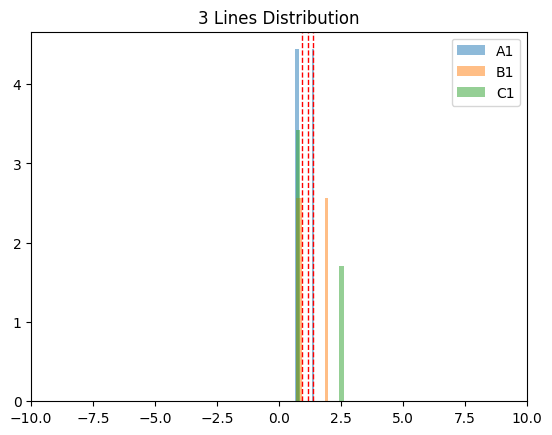

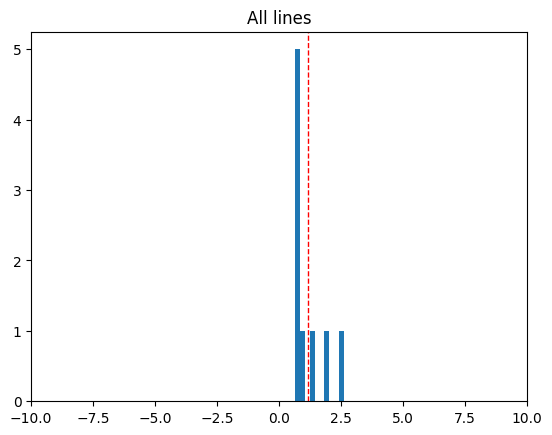


Processing Vano 0
Umbral de corte inferior detectado: -4587882.060554318
Umbral de corte superior detectado: -4587770.487469982

Processing Vano 1

Processing Vano 2

Processing Vano 3

Processing Vano 4

Processing Vano 5

Processing Vano 6
Umbral de corte inferior detectado: -3832123.7057611994

Processing Vano 7
Umbral de corte inferior detectado: -708907.28493114

Processing Vano 8
Umbral de corte inferior detectado: -710058.0912884551

Processing Vano 9

Processing Vano 10

Processing Vano 11

Processing Vano 12

Processing Vano 13

Processing Vano 14

Processing Vano 15

Processing Vano 16

Processing Vano 17

Processing Vano 18

Processing Vano 19

Processing Vano 20

Processing Vano 21

Processing Vano 22

Processing Vano 23

Processing Vano 24

Processing Vano 25

Processing Vano 26

Processing Vano 27

Processing Vano 28
Umbral de corte inferior detectado: -711215.2702545001

Processing Vano 29
Umbral de corte inferior detectado: -713259.4252104687

Processing Vano 30
Umbral

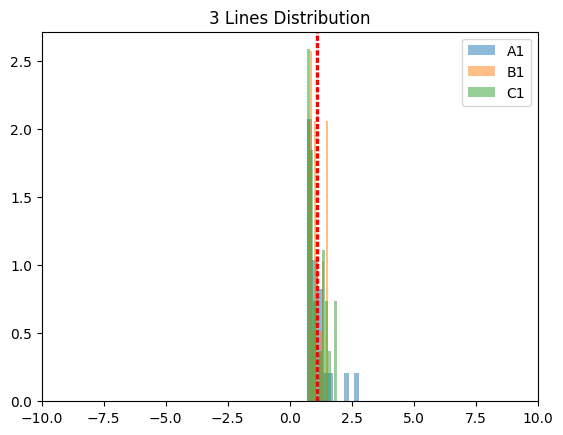

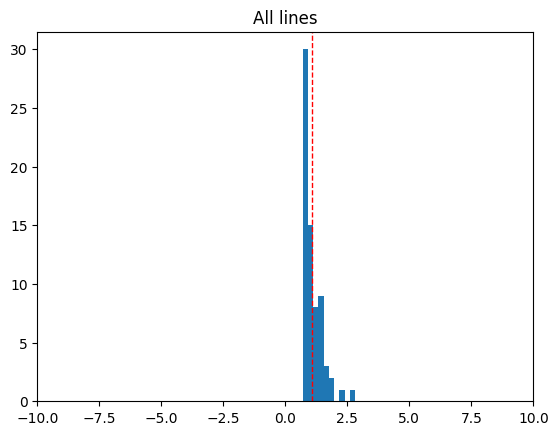


Processing Vano 0

Processing Vano 1
Umbral de corte inferior detectado: -2784357.7462366684
Umbral de corte superior detectado: -2784247.5663992786

Processing Vano 2
Umbral de corte inferior detectado: -2797900.2300038426
Umbral de corte superior detectado: -2797801.6903558127
Error en el cluster G_13576773_13576897
This cluster represents: 0.69%

Processing Vano 3
Umbral de corte inferior detectado: -2799930.109122286
Umbral de corte superior detectado: -2799804.903328614
Error en el cluster G_13576773_13576774
This cluster represents: 0.44%

Processing Vano 4
Umbral de corte inferior detectado: -2802456.108395775
Umbral de corte superior detectado: -2802335.382156318
Error en el cluster G_13576907_13576908
This cluster represents: 1.67%

Processing Vano 5
Umbral de corte superior detectado: -2340533.210728575

Processing Vano 6

Processing Vano 7

Processing Vano 8

Processing Vano 9

Processing Vano 10
Umbral de corte inferior detectado: 118832.53365239952

Processing Vano 11
Umb

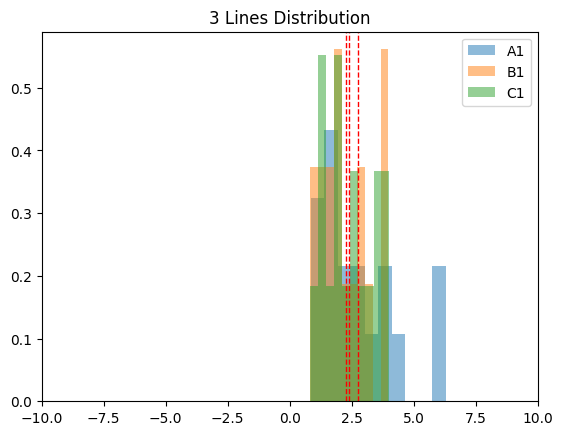

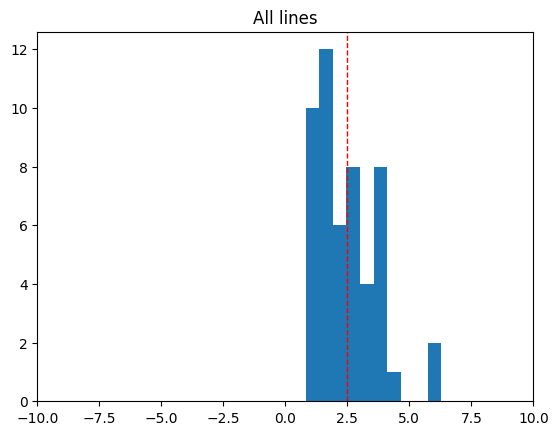


Processing Vano 0

Processing Vano 1

Processing Vano 2

Processing Vano 3

Processing Vano 4

Processing Vano 5

Processing Vano 6

Processing Vano 7

Processing Vano 8

Processing Vano 9
Umbral de corte inferior detectado: -4694624.258775833
Umbral de corte superior detectado: -4694405.728620398

Processing Vano 10

Processing Vano 11

Processing Vano 12

Processing Vano 13

Processing Vano 14

Processing Vano 15

Processing Vano 16
Umbral de corte superior detectado: -4186489.863163928

Processing Vano 17
Umbral de corte superior detectado: -4471360.717461009

Processing Vano 18
Umbral de corte inferior detectado: 4692103.806625351
Umbral de corte superior detectado: 4692193.802346572

Processing Vano 19

Processing Vano 20
Umbral de corte inferior detectado: -1042432.4659481401

Processing Vano 21
Umbral de corte inferior detectado: 1049618.9092660663
Umbral de corte superior detectado: 1049752.7485602195

Processing Vano 22
Umbral de corte superior detectado: -649480.4406086168



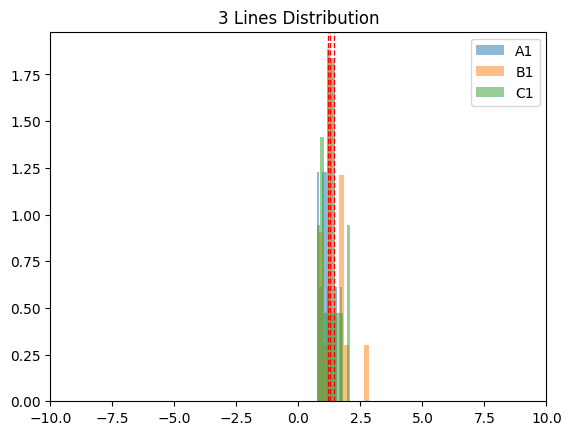

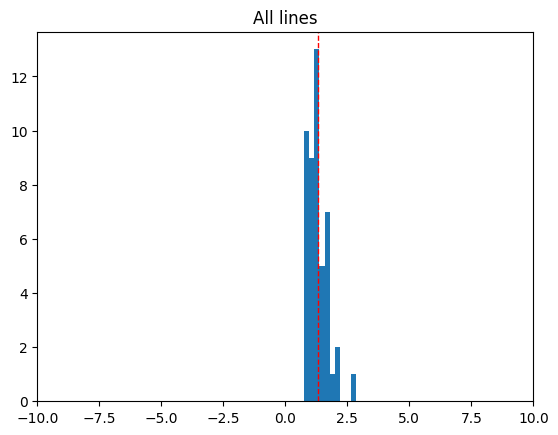

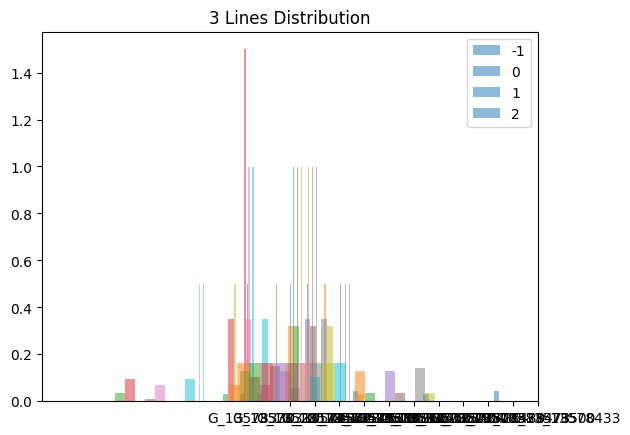

In [113]:
labels=group_vanos(data,k=10)
plot_full_net(data,labels)

In [1]:
for idf in df1.loc[df1['C1'].isna(),'ID']:
    
    for i in range(len(data)):
    
        print(f"\nProcessing Vano {i}")

        idv=data[i]['ID_VANO']
        if idv==idf:
            print("L")
            cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)
            rotated_conds, rotated_apoyos, rotated_vertices, rotated_extremos = rotate_vano(cond_values, extremos_values, apoyo_values, vert_values)
                
            
            print(extremos_values)
            plt.figure(figsize=(10, 6))
            plt.scatter(rotated_conds[1], rotated_conds[2], label='Conductor', s=1)
            # plt.plot(scaler_y.inverse_transform(cond_values[2]).flatten(), cond_values[1], "-o", linewidth=1, markersize = 2 , color='red', label='Catenaria')
            plt.xlabel('Y')
            plt.ylabel('Z')
            plt.legend()
            plt.title(f'Catenaria vs Conductor original - Erróneo {idf}')
        else:
            cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)
            rotated_conds, rotated_apoyos, rotated_vertices, rotated_extremos = rotate_vano(cond_values, extremos_values, apoyo_values, vert_values)
            plt.figure(figsize=(10, 6))
            plt.scatter(rotated_conds[1], rotated_conds[2], label='Conductor', s=1)
            # plt.plot(scaler_y.inverse_transform(cond_values[2]).flatten(), cond_values[1], "-o", linewidth=1, markersize = 2 , color='red', label='Catenaria')
            plt.xlabel('Y')
            plt.ylabel('Z')
            plt.legend()
            plt.title(f'Catenaria vs Conductor original - Correcto {idf} Er')

            print(extremos_values)
        # if i>5:
        #     break

NameError: name 'df1' is not defined


Processing Vano 0
[array([118131.5911, 118131.5911, 118138.6577, 118138.6577]), array([4693693.3301, 4693693.3301, 4693707.1072, 4693707.1072]), array([597.4325, 607.6854, 598.6194, 608.4023])]

Processing Vano 1
[array([118131.5911, 118131.5911, 118138.6577, 118138.6577]), array([4693693.3301, 4693693.3301, 4693707.1072, 4693707.1072]), array([597.4325, 607.6854, 598.6194, 608.4023])]

Processing Vano 2
[array([118131.5911, 118131.5911, 118138.6577, 118138.6577]), array([4693693.3301, 4693693.3301, 4693707.1072, 4693707.1072]), array([597.4325, 607.6854, 598.6194, 608.4023])]

Processing Vano 3
[array([118131.5911, 118131.5911, 118138.6577, 118138.6577]), array([4693693.3301, 4693693.3301, 4693707.1072, 4693707.1072]), array([597.4325, 607.6854, 598.6194, 608.4023])]

Processing Vano 4
[array([118131.5911, 118131.5911, 118138.6577, 118138.6577]), array([4693693.3301, 4693693.3301, 4693707.1072, 4693707.1072]), array([597.4325, 607.6854, 598.6194, 608.4023])]

Processing Vano 5
[array

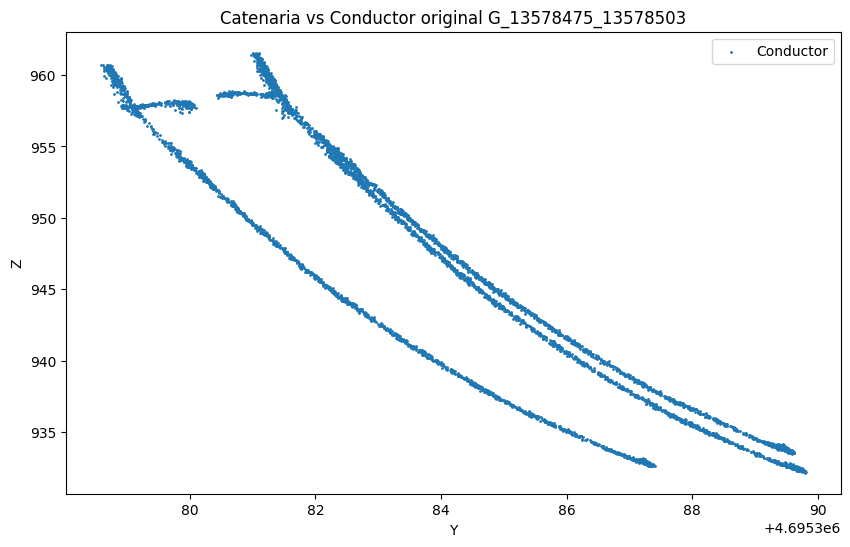

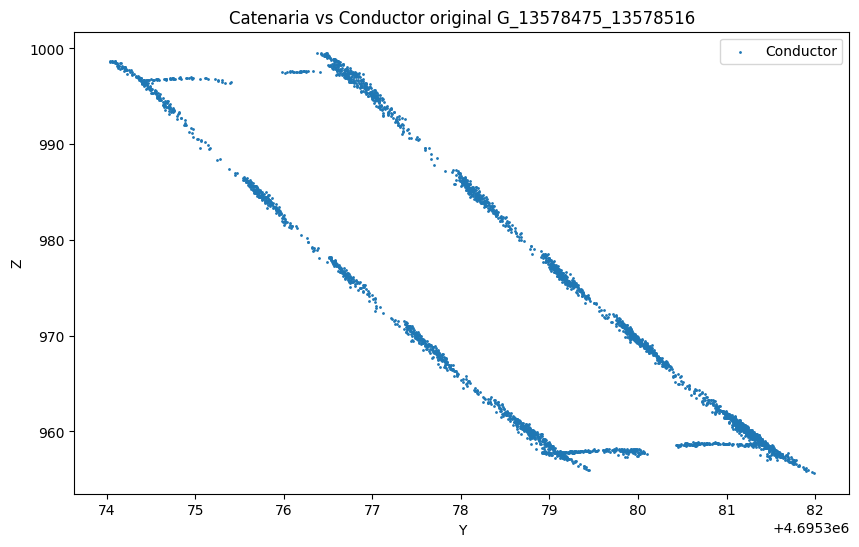

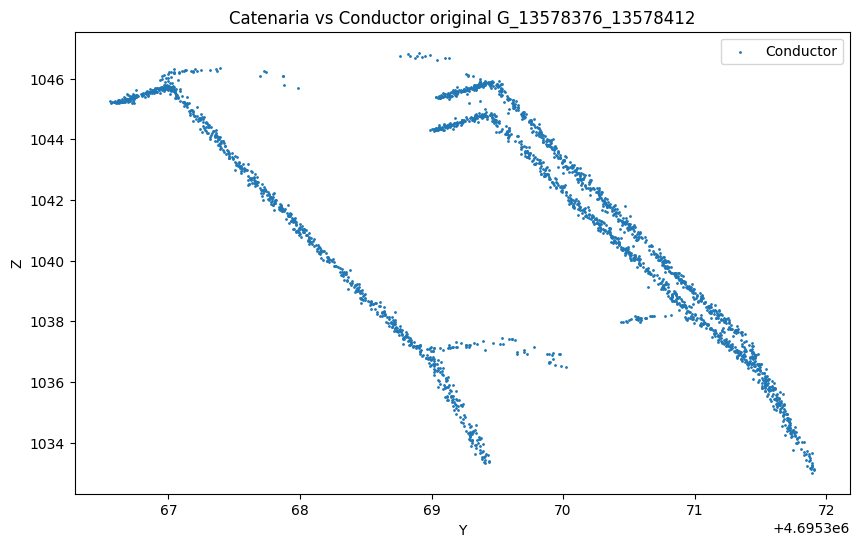

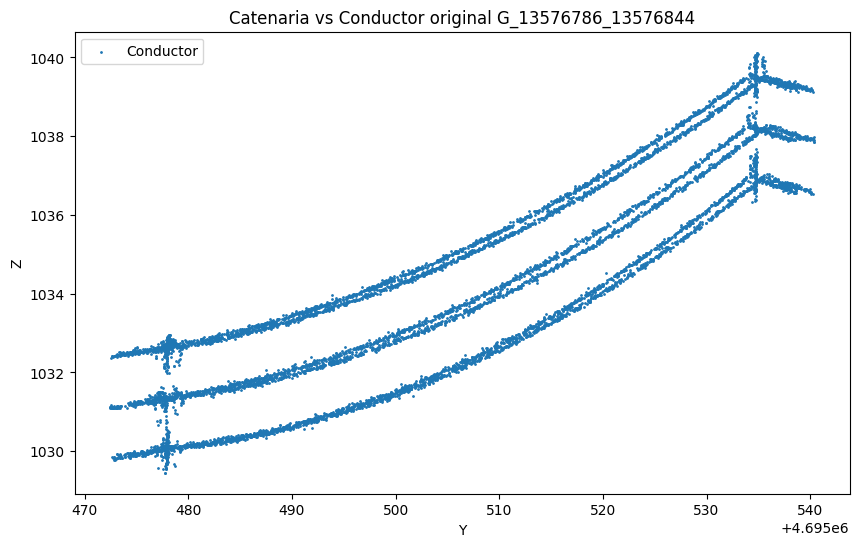

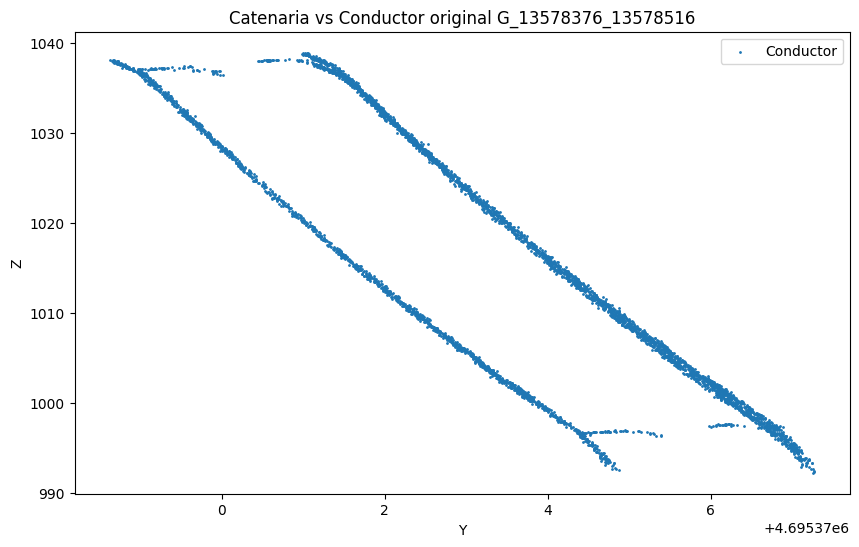

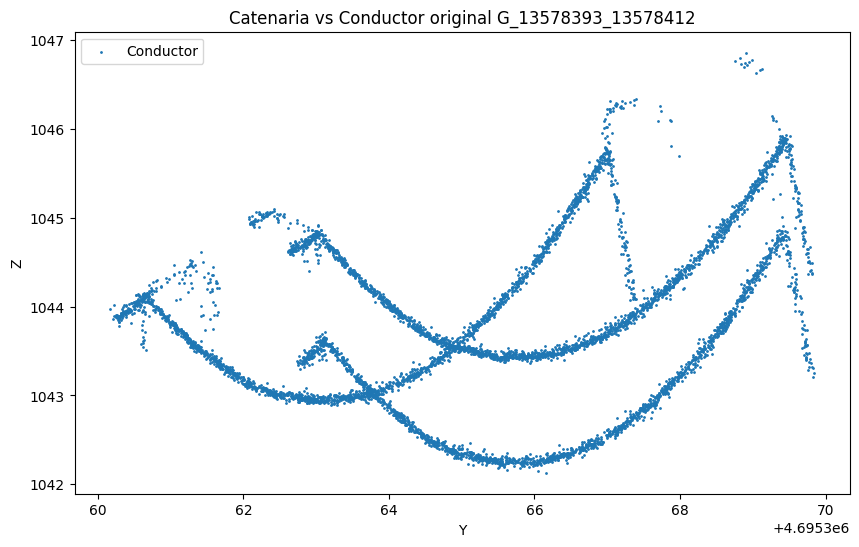

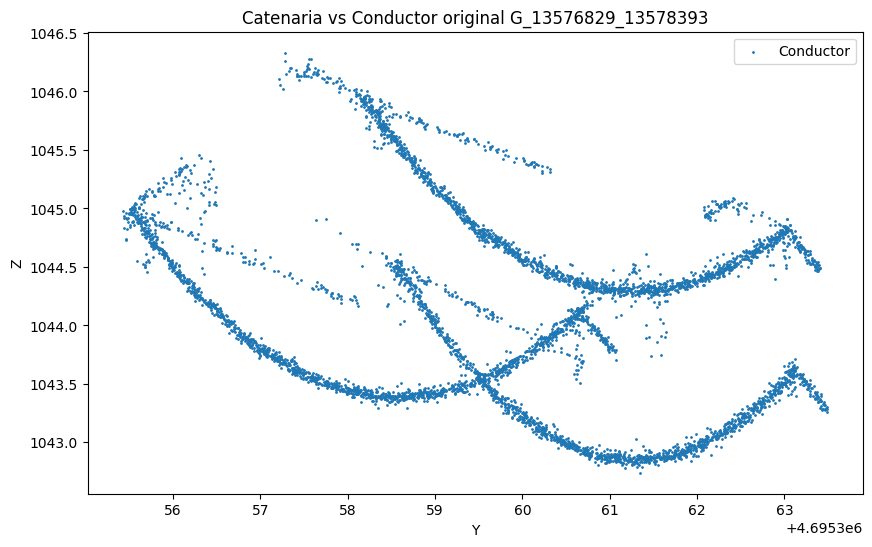

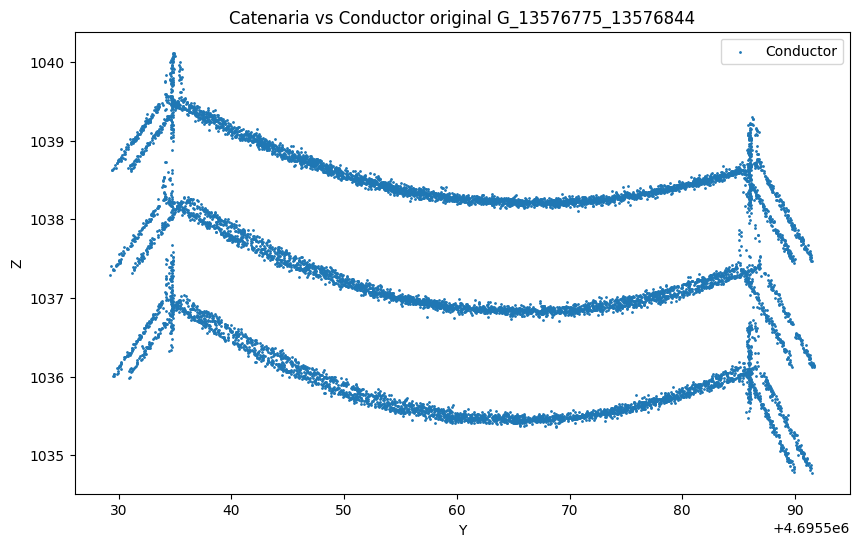

In [20]:
for idf in df1.loc[df1['C1'].isna(),'ID']:
    
    for i in range(len(data)):
    
        print(f"\nProcessing Vano {i}")

        idv=data[i]['ID_VANO']
        if idv==idf:
            print("L")
            cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)
            
            print(extremos_values)
            plt.figure(figsize=(10, 6))
            plt.scatter(cond_values[1], cond_values[2], label='Conductor', s=1)
            # plt.plot(scaler_y.inverse_transform(cond_values[2]).flatten(), cond_values[1], "-o", linewidth=1, markersize = 2 , color='red', label='Catenaria')
            plt.xlabel('Y')
            plt.ylabel('Z')
            plt.legend()
            plt.title(f'Catenaria vs Conductor original {idf}')
        else:

            print(extremos_values)

In [56]:
for idf in df1.loc[df1['C1'].isna(),'ID']:
    
    for i in range(len(data)):
    
        print(f"\nProcessing Vano {i}")

        idv=data[i]['ID_VANO']
        cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)
        cond_values=np.vstack(cond_values)
        apoyo_values=np.vstack(apoyo_values)

        if np.array(extremos_values).shape[1]==4:
            rotated_conds, rotated_apoyos, rotated_vertices, rotated_extremos = rotate_vano(cond_values, extremos_values, apoyo_values, vert_values)
            
            cropped_conds = clean_outliers(rotated_conds, rotated_extremos)
            
            X_scaled = scale_conductor(cropped_conds)

            labels, centroids = kmeans_clustering(X_scaled, n_clusters=3, max_iterations=1000)
            # print(X_scaled)
        if idv==idf:
            print("L")
                
            print(np.unique(np.array(labels)))
            print(extremos_values)
            plt.figure(figsize=(10, 6))
            plt.scatter(X_scaled[0], X_scaled[1],c=labels, cmap='viridis', s=1)
            # plt.plot(scaler_y.inverse_transform(cond_values[2]).flatten(), cond_values[1], "-o", linewidth=1, markersize = 2 , color='red', label='Catenaria')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.legend()
            plt.title(f'Catenaria vs Conductor original - Erróneo {idf}')
        # else:
        #     cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)
        #     plt.figure(figsize=(10, 6))
        #     plt.scatter(X_scaled[0], X_scaled[1], c=labels, cmap='viridis', s=1)
        #     # plt.plot(scaler_y.inverse_transform(cond_values[2]).flatten(), cond_values[1], "-o", linewidth=1, markersize = 2 , color='red', label='Catenaria')
        #     plt.xlabel('X')
        #     plt.ylabel('Y')
        #     plt.legend()
        #     plt.title(f'Catenaria vs Conductor original - Correcto {idf} Er')

        #     print(extremos_values)
        # if i>5:
        #     break


Processing Vano 0
Umbral de corte inferior detectado: -4587882.060554318
Umbral de corte superior detectado: -4587770.487469982

Processing Vano 1
Umbral de corte inferior detectado: -2784357.7462366684
Umbral de corte superior detectado: -2784247.5663992786

Processing Vano 2
Umbral de corte inferior detectado: -2797900.2300038426
Umbral de corte superior detectado: -2797801.6903558127

Processing Vano 3
Umbral de corte inferior detectado: -2799930.109122286
Umbral de corte superior detectado: -2799804.903328614

Processing Vano 4
Umbral de corte inferior detectado: -2802456.108395775
Umbral de corte superior detectado: -2802335.382156318

Processing Vano 5
Umbral de corte superior detectado: -2340533.210728575

Processing Vano 6
Umbral de corte inferior detectado: -3832123.7057611994

Processing Vano 7
Umbral de corte inferior detectado: -708907.28493114

Processing Vano 8
Umbral de corte inferior detectado: -710058.0912884551

Processing Vano 9
Umbral de corte inferior detectado: -

/tmp/ipykernel_1829227/3729703927.py:31: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.




Processing Vano 14
Umbral de corte inferior detectado: 2873350.8379759043

Processing Vano 15
Umbral de corte inferior detectado: -2868098.035749457
Umbral de corte superior detectado: -2868031.043597402

Processing Vano 16
Umbral de corte superior detectado: -4186489.863163928

Processing Vano 17
Umbral de corte superior detectado: -4471360.717461009

Processing Vano 18
Umbral de corte inferior detectado: 4692103.806625351
Umbral de corte superior detectado: 4692193.802346572

Processing Vano 19
Umbral de corte superior detectado: -2166325.9738128544

Processing Vano 20
Umbral de corte inferior detectado: -1042432.4659481401

Processing Vano 21
Umbral de corte inferior detectado: 1049618.9092660663
Umbral de corte superior detectado: 1049752.7485602195

Processing Vano 22
Umbral de corte superior detectado: -649480.4406086168

Processing Vano 23
Umbral de corte inferior detectado: 644296.613117003
Umbral de corte superior detectado: 644389.0192780998

Processing Vano 24

Processing V

/tmp/ipykernel_1829227/3729703927.py:31: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Umbral de corte inferior detectado: -2868098.035749457
Umbral de corte superior detectado: -2868031.043597402

Processing Vano 16
Umbral de corte superior detectado: -4186489.863163928

Processing Vano 17
Umbral de corte superior detectado: -4471360.717461009

Processing Vano 18
Umbral de corte inferior detectado: 4692103.806625351
Umbral de corte superior detectado: 4692193.802346572

Processing Vano 19
Umbral de corte superior detectado: -2166325.9738128544

Processing Vano 20
Umbral de corte inferior detectado: -1042432.4659481401

Processing Vano 21
Umbral de corte inferior detectado: 1049618.9092660663
Umbral de corte superior detectado: 1049752.7485602195

Processing Vano 22
Umbral de corte superior detectado: -649480.4406086168

Processing Vano 23
Umbral de corte inferior detectado: 644296.613117003
Umbral de corte superior detectado: 644389.0192780998

Processing Vano 24

Processing Vano 25
Umbral de corte inferior detectado: -2797774.1438695285
Umbral de corte superior detecta

/tmp/ipykernel_1829227/3729703927.py:31: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Umbral de corte inferior detectado: 2797898.5558883003

Processing Vano 34
Umbral de corte superior detectado: -4693181.916910582

Processing Vano 35
Umbral de corte inferior detectado: -4469907.653091533
Umbral de corte superior detectado: -4469852.214263798

Processing Vano 36
Umbral de corte inferior detectado: -4470194.104073849

Processing Vano 37
Umbral de corte superior detectado: -1483068.0894055492

Processing Vano 38
Umbral de corte inferior detectado: -4561403.441642142
Umbral de corte superior detectado: -4561300.254488298

Processing Vano 39
Umbral de corte inferior detectado: -4574472.709068636
Umbral de corte superior detectado: -4574374.45025618

Processing Vano 40
Umbral de corte superior detectado: -4562005.403696566

Processing Vano 41
Umbral de corte inferior detectado: -1043223.8508059441

Processing Vano 42
Umbral de corte inferior detectado: -463063.1591852372
Umbral de corte superior detectado: -462992.87176887033

Processing Vano 43
Umbral de corte inferior det

/tmp/ipykernel_1829227/3729703927.py:31: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Umbral de corte inferior detectado: -4691953.142729324
Umbral de corte superior detectado: -4691882.612176192

Processing Vano 55
Umbral de corte inferior detectado: -4561631.044524173
Umbral de corte superior detectado: -4561568.9869625075

Processing Vano 56
Umbral de corte superior detectado: -1045046.2118790081

Processing Vano 57
Umbral de corte inferior detectado: -4469884.143349525
Umbral de corte superior detectado: -4469791.46148089

Processing Vano 58

Processing Vano 59
Umbral de corte inferior detectado: -26671.398115403914
Umbral de corte superior detectado: -26605.586524593702

Processing Vano 60
Umbral de corte superior detectado: -643594.4448454393

Processing Vano 61
Umbral de corte superior detectado: 4481386.1829049215

Processing Vano 62
Umbral de corte inferior detectado: -4591029.612788843
Umbral de corte superior detectado: -4590979.314390755

Processing Vano 63
Umbral de corte inferior detectado: -2801844.1573914923
Umbral de corte superior detectado: -2801763.7

In [21]:
df2

,ID,A1,A2,A3,B1,B2,B3,C1,C2,C3
0,G_13578498_13578512,3.242115,2.589639,-4.593476,3.907155,3.362087,-5.506330,3.153578,2.568148,-4.563866
1,G_13578435_13578450,0.848950,0.262506,-1.792868,0.843229,0.263327,-1.463458,0.870417,0.286652,-1.754062
2,G_13578338_13578340,0.796701,-0.306949,-1.730422,0.815279,-0.316829,-1.620450,0.788884,-0.299109,-1.749936
3,G_13578407_13578444,1.635878,1.236908,-2.606489,1.688759,1.354911,-2.587220,1.661582,1.246127,-2.585165
4,G_13578394_13578435,0.783930,0.164147,-1.726718,0.778293,0.127890,-1.577287,0.809817,0.183158,-1.619957
5,G_13578301_13578439,0.703510,-0.092450,-1.800488,0.765495,-0.079037,-1.367692,0.712439,-0.077787,-1.808673
6,G_13578336_13578432,1.567531,-0.941893,-2.185975,1.555399,-0.884900,-2.384994,NaN,NaN,NaN
7,G_13578391_13578409,19725.382750,19013.712052,-29621.978280,3.153690,1.387645,-3.146235,1.600775,0.223712,-2.075970
8,G_13578334_13578477,3.739729,3.270256,-5.401606,3.507874,3.016271,-5.134997,3.828851,3.384010,-5.614289
9,G_13578302_13578473,0.986193,0.349392,-1.819997,1.029883,0.391807,-1.363376,0.865788,0.303415,-1.950299



Processing Vano 0

Processing Vano 1

Processing Vano 2

Processing Vano 3

Processing Vano 4

Processing Vano 5

Processing Vano 6

Processing Vano 7

Processing Vano 8

Processing Vano 9

Processing Vano 10

Processing Vano 11

Processing Vano 12

Processing Vano 13

Processing Vano 14

Processing Vano 15

Processing Vano 16

Processing Vano 17

Processing Vano 18

Processing Vano 19

Processing Vano 20

Processing Vano 21

Processing Vano 22

Processing Vano 23

Processing Vano 24

Processing Vano 25

Processing Vano 26

Processing Vano 27

Processing Vano 28

Processing Vano 29

Processing Vano 30

Processing Vano 31

Processing Vano 32

Processing Vano 33

Processing Vano 34

Processing Vano 35

Processing Vano 36

Processing Vano 37

Processing Vano 38

Processing Vano 39

Processing Vano 40

Processing Vano 41

Processing Vano 42

Processing Vano 43

Processing Vano 44

Processing Vano 45

Processing Vano 46

Processing Vano 47

Processing Vano 48

Processing Vano 49

Processin

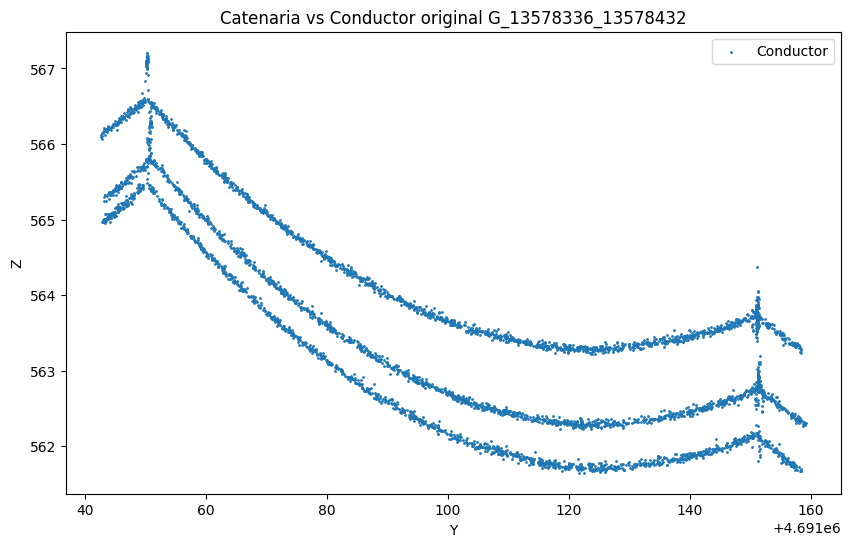

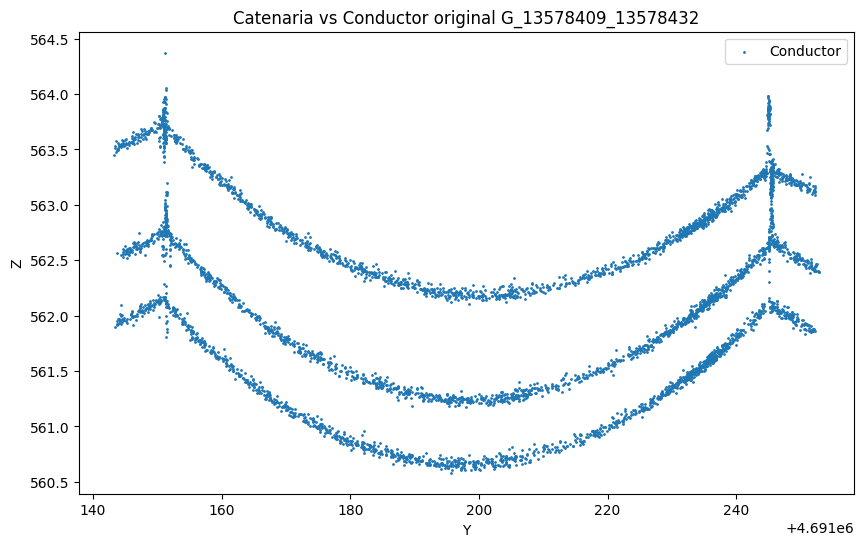

In [22]:
for idf in df2.loc[df2['C1'].isna(),'ID']:
    
    for i in range(len(data)):
    
        print(f"\nProcessing Vano {i}")

        idv=data[i]['ID_VANO']
        if idv==idf:
                
            cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)
            
            plt.figure(figsize=(10, 6))
            plt.scatter(cond_values[1], cond_values[2], label='Conductor', s=1)
            # plt.plot(scaler_y.inverse_transform(cond_values[2]).flatten(), cond_values[1], "-o", linewidth=1, markersize = 2 , color='red', label='Catenaria')
            plt.xlabel('Y')
            plt.ylabel('Z')
            plt.legend()
            plt.title(f'Catenaria vs Conductor original {idf}')